In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import imageio
from skimage import morphology
from skimage.morphology import disk

# Auxiliary functions

In [2]:
# Normalizes the image to the interval [a, b]
def normalize(r, a=0, b=255):
    return a + (b-a)*(r - np.amin(r))/( np.amax(r) - np.amin(r))

# Reading input

In [ ]:
filename = str(input()).rstrip()
img      = imageio.imread(filename)
k        = int(input())
option   = int(input())

In [3]:
img = imageio.imread("images/pencil.png")

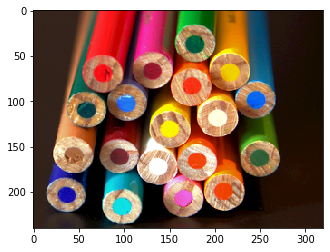

In [4]:
plt.imshow(img)

# 1) RGB opening

In [ ]:
def rgb_open(img, size):
    eroded_r = morphology.erosion(img[:, :, 0], disk(size))
    eroded_g = morphology.erosion(img[:, :, 1], disk(size))
    eroded_b = morphology.erosion(img[:, :, 2], disk(size))

    opened_r = morphology.dilation(eroded_r, disk(size))
    opened_g = morphology.dilation(eroded_g, disk(size))
    opened_b = morphology.dilation(eroded_b, disk(size))

    result = np.zeros(img.shape, dtype=np.uint8)

    result[:, :, 0] = opened_r
    result[:, :, 1] = opened_g
    result[:, :, 2] = opened_b

    return result

# 2) Compositions of operations

In [10]:
# Morphological gradient: differente between the dilation and the erosion of a given image
def morphological_gradient(img, size):
    img_dilation = morphology.dilation(img, disk(size))
    img_erosion  = morphology.erosion(img, disk(size))
    
    return img_dilation - img_erosion

In [8]:
# Transforms from RGB to HSV
img_hsv = mpl.colors.rgb_to_hsv(img)

# Normalizes the H channel to the interval [0, 255]
H_norm = normalize(img_hsv[:, :, 0])

H_opening = 
H_closing = 
grad_norm = 

result = np.zeros(img.shape, dtype=np.uint8)

result[:, :, 0] = grad_norm

array([[19.492931 , 14.721935 , 18.491318 , ..., 19.065187 , 25.131384 ,
        25.131384 ],
       [17.012014 ,  7.5946493, 21.265017 , ..., 24.038715 , 25.131384 ,
        21.265017 ],
       [18.22716  , 18.491318 ,  8.506007 , ..., 25.131384 , 25.131384 ,
        25.131384 ],
       ...,
       [12.404593 , 10.632508 ,  9.11358  , ..., 13.198976 , 15.310813 ,
        13.670368 ],
       [16.357706 , 10.207208 , 18.902239 , ..., 15.948763 , 14.176679 ,
        15.948763 ],
       [11.5991   , 10.632508 , 10.207208 , ..., 15.310813 , 16.132082 ,
        22.38423  ]], dtype=float32)

Text(0.5, 1.0, 'Value')

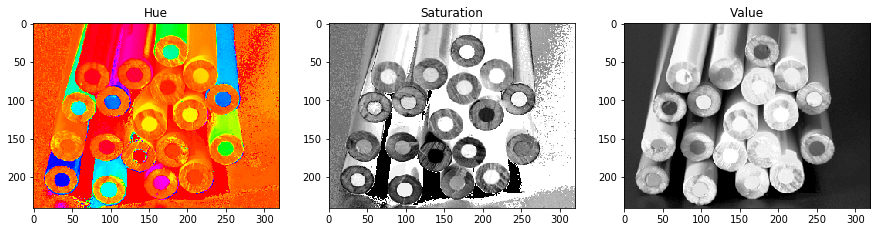

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(131); plt.imshow(img_hsv[:,:,0], cmap="hsv"); plt.title("Hue");
plt.subplot(132); plt.imshow(img_hsv[:,:,1], cmap="gray"); plt.title("Saturation")
plt.subplot(133); plt.imshow(img_hsv[:,:,2], cmap="gray"); plt.title("Value")